In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Pressure data processing
theta = np.concatenate((np.arange(0,95,5), np.arange(100,200,20)))
Pmean = np.empty(len(theta)) #
Pstd = np.empty(len(theta))
Pstd_bar = np.empty(len(theta))

for i in range(len(theta)):
    fileName = './Data/Pcyl_deg' + str(theta[i])
    data = np.loadtxt(fileName)
    Pmean[i] = np.mean(data)
    Pstd[i] = np.mean(data)
    


In [87]:
# Freestream data processing
yD_free = np.arange(0,5,1)
uMean_free = np.empty(len(yD_free)) #m/s
std_u_free = np.empty(len(yD_free))
Uinf = 15 #m/s
mmHg_to_Pa = 133.32 #conversion factor 

for i in range(len(yD_free)):
    fileName = './Data/Uinf_yD' + str(yD_free[i])
    data = np.loadtxt(fileName)
    uMean_free[i] = np.mean(data) * mmHg_to_Pa
    std_u_free[i] = (np.std(data) * mmHg_to_Pa)/np.sqrt(len(data))

def convert_PtoU(x):
    R_air = 287.058 #J/kgK
    T_rm = 19 + 273.15 #K
    P_rm = 665 * mmHg_to_Pa #Pa
    rho = P_rm/(R_air*T_rm) #kg/m3 of air
    
    for i in range(len(x)):
        x[i] = np.sqrt((2*x[i])/rho)
        
    return x

uMean_free = convert_PtoU(uMean_free)
std_u_free = convert_PtoU(std_u_free)
print(uMean_free)
print(std_u_free)
Uinf = np.mean(uMean_free)

[6.32184861 6.32630158 6.33878479 6.37380529 6.41420404]
[0.07448238 0.08742142 0.07775004 0.08070499 0.09268616]


In [95]:
# Wake profile data processing
yD = np.concatenate((np.arange(0.0,0.7,0.1), np.arange(0.8, 2.8, 0.2), np.arange(3, 4.5, 0.5)))
uMean = np.empty(len(yD))
std_u = np.empty(len(yD))
std_u_bar = np.empty(len(yD))

for i in range(len(yD)):
    fileName = './Data/Uwake_yD' + str(round(yD[i],1))
    data = np.loadtxt(fileName)
    uMean[i] = np.mean(data) * mmHg_to_Pa
    std_u[i] = np.std(data)
    std_u_bar[i] = (np.std(data) * mmHg_to_Pa)/np.sqrt(len(data))
    
uMean = convert_PtoU(uMean)
std_u = convert_PtoU(std_u)
std_u_bar = convert_PtoU(std_u_bar)
print(uMean)
print(std_u)
print(std_u_bar)

[5.22588822 5.29884507 5.37217907 5.51413753 5.65098135 5.84401924
 6.04028824 6.25103063 6.37023704 6.44718601 6.50553754 6.56117987
 6.61627686 6.63953275 6.66272512 6.67408728 6.67037505 6.66804347
 6.67203763 6.69736308]
[0.12177841 0.1218419  0.12557682 0.12302592 0.1030828  0.10035851
 0.0970836  0.08655329 0.08622729 0.08134891 0.07704765 0.07446326
 0.06735934 0.05763232 0.05492321 0.04613243 0.04559309 0.04518393
 0.04341008 0.04428698]
[0.22586579 0.22598355 0.23294959 0.22817959 0.19119053 0.18613772
 0.18006364 0.16053278 0.15992815 0.15088008 0.14290241 0.13810907
 0.12493324 0.10689226 0.1018676  0.08556309 0.08456276 0.08380388
 0.08051388 0.08214029]


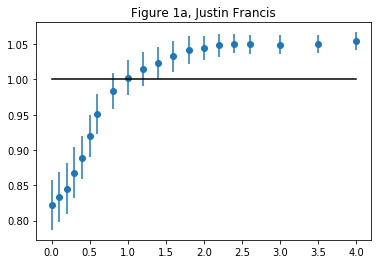

In [96]:
#fig 1a

plt.figure(1)
plt.errorbar(yD, np.divide(uMean, Uinf), yerr=np.divide(std_u_bar, Uinf), fmt='o')
plt.errorbar([min(yD), max(yD)], [1,1], color='k')
plt.title('Figure 1a, Justin Francis')
plt.show()

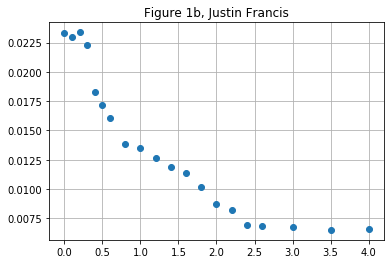

In [99]:
#fig 1b
plt.figure(2)
plt.title('Figure 1b, Justin Francis')
plt.plot(yD, np.divide(std_u,uMean), 'o')
plt.grid()
plt.show()

In [ ]:
#fig 1c
